In [ ]:
import numpy as np 
import pandas as pd 
from keras.datasets import cifar10 
from keras.applications.vgg16 import preprocess_input

In [ ]:
#we resize the image to 64x64 
import tensorflow as tf 

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train_new = tf.image.resize(x_train, [64,64])

In [ ]:
x_train_new = x_train_new/255.

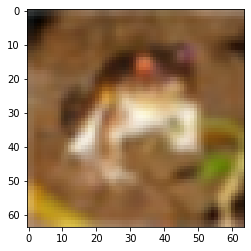

In [ ]:
import matplotlib.pyplot as plt 

plt.imshow(x_train_new[0])

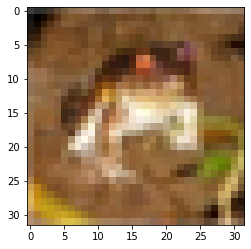

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0])

In [ ]:
x_train_128 = x_train[:10]

In [ ]:
x_train_128 = tf.image.resize(x_train_128,[128,128])

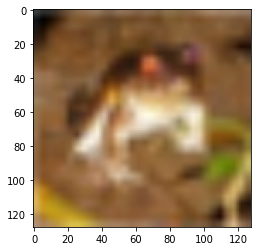

In [ ]:
import matplotlib.pyplot as plt 

plt.imshow(x_train_128[0]/255.)

In [ ]:
#we'll be using the 64x64x3 image otherwise bigger than that, we'll lose local 
#information. 


In [ ]:
#create a vgg16 object. 

In [ ]:
from tensorflow.keras.applications import VGG16
vgg_conv = VGG16(weights="imagenet",include_top=False,input_shape =(64,64,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg_conv.layers:
  layer.trainable = False



In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
model = Sequential()

In [ ]:
model.add(vgg_conv) #add the vgg16 model to our model. 

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [ ]:
x_test_new = x_test_new = tf.image.resize(x_test, [64,64])


In [ ]:
x_test_new = x_test_new/255.

In [ ]:
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
training = model.fit(x_train_new,y_train, validation_split=0.2,epochs=10)

Epoch 1/10
1250/1250 [==============================] - 22s 10ms/step - loss: 2.4826 - accuracy: 0.2004 - val_loss: 1.6824 - val_accuracy: 0.3949
Epoch 2/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.7874 - accuracy: 0.3439 - val_loss: 1.4811 - val_accuracy: 0.4830
Epoch 3/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.6170 - accuracy: 0.4289 - val_loss: 1.3688 - val_accuracy: 0.5344
Epoch 4/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5110 - accuracy: 0.4779 - val_loss: 1.3173 - val_accuracy: 0.5589
Epoch 5/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.4353 - accuracy: 0.5119 - val_loss: 1.2824 - val_accuracy: 0.5736
Epoch 6/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.3779 - accuracy: 0.5413 - val_loss: 1.2544 - val_accuracy: 0.5811
Epoch 7/10
1250/1250 [==============================] - 13s 10ms/step - loss: 1.3188 - accuracy: 0.5620 - val_loss: 1.2244 -

In [ ]:
model.evaluate(x_test_new,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.2140 - accuracy: 0.6109


[1.2139555215835571, 0.6108999848365784]

In [ ]:
y_pred = model.predict(x_test_new)

313/313 [==============================] - 2s 7ms/step


In [ ]:
y_pred = np.argmax(y_pred,axis=1)

Text(69.0, 0.5, 'Ground Truth')

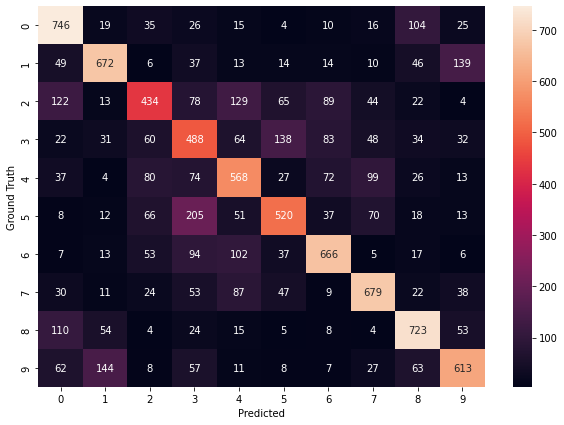

In [ ]:
import tensorflow as tf 
import seaborn as sn 

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')


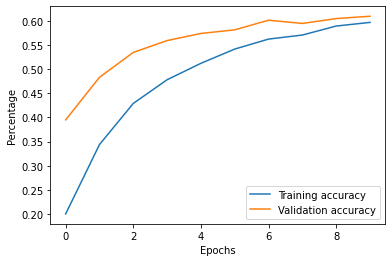

In [ ]:
accuracy = training.history['accuracy']
val_acc= training.history['val_accuracy']
plt.plot(range(len(accuracy)),accuracy,label='Training accuracy')
plt.plot(range(len(accuracy)),val_acc,label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.legend()
plt.show()